### Create an Experiment

In [1]:
from mlflow_utils import create_mlflow_experiment
from mlflow import MlflowClient

experiment_id = create_mlflow_experiment(
    experiment_name="model_registry",
    artifact_location="model_registry_artifacts",
    tags={"purpose": "learning"},
)

print(experiment_id)

client = MlflowClient()
model_name = "registered_model_1"

Experiment model_registry already exists.
533954857939339914


### Create a Registered Model

In [2]:
client.create_registered_model(model_name)

<RegisteredModel: aliases={}, creation_timestamp=1741073470427, description=None, last_updated_timestamp=1741073470427, latest_versions=[], name='registered_model_1', tags={}>

#### No description, version, etc

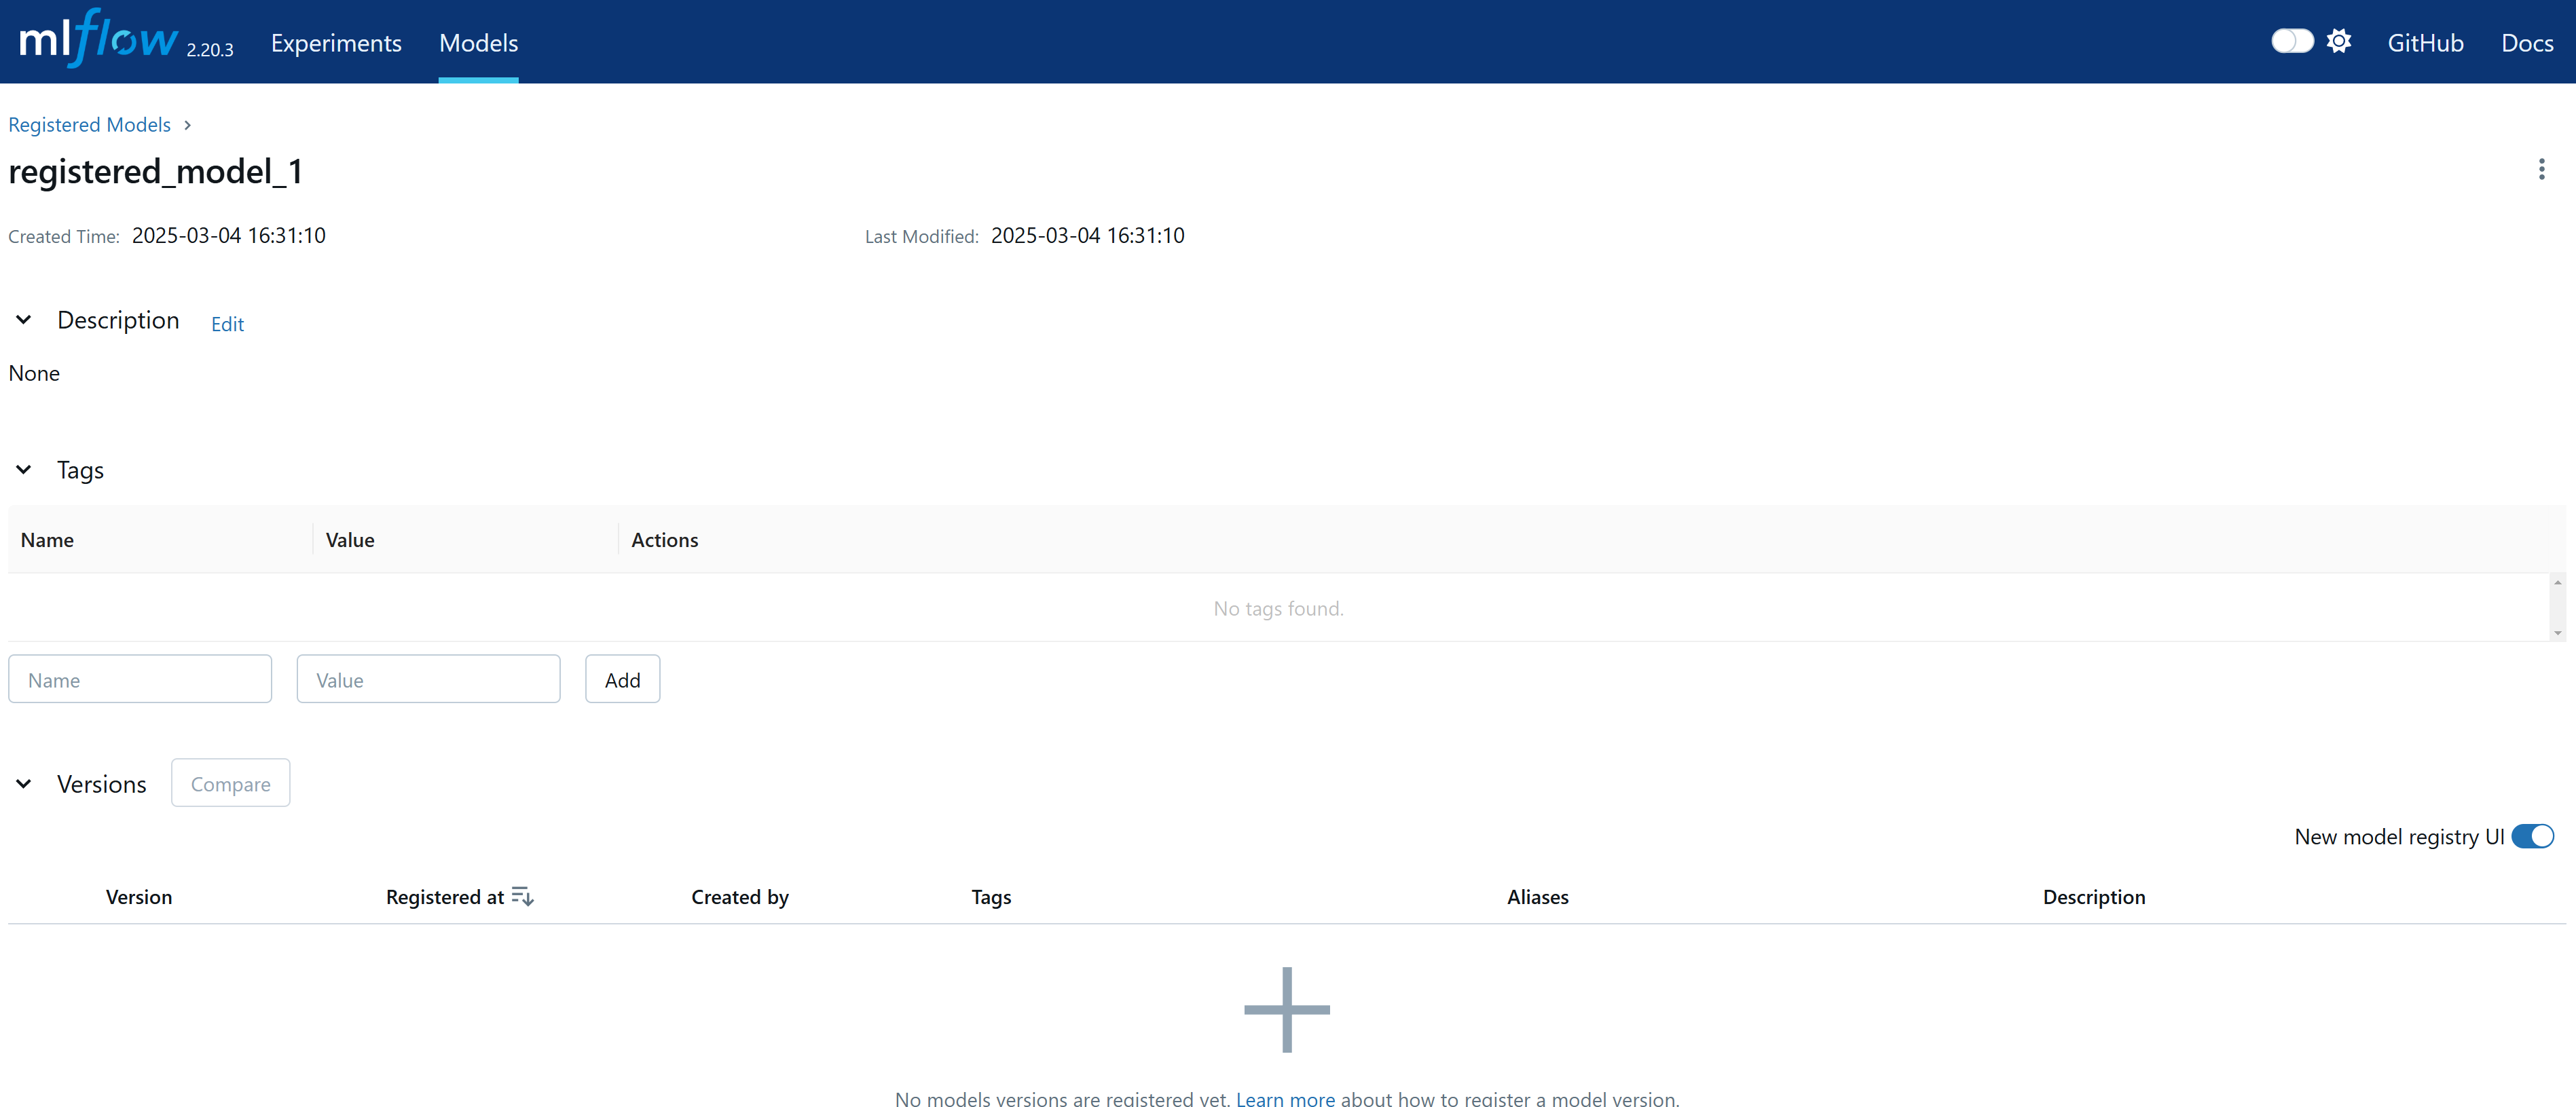

### Create a Model Version

- Creating a new version of the model(`rft_modelx`) with a new name called 'registered_model_1'
- It is basically registering a model if it is the first version.

In [3]:
source = "file:///c:/Users/dof07/Desktop/mlflow/model_registry_artifacts/97a00b6f50504b77a8693cb830d99797/artifacts/rft_modelx"
run_id = "533954857939339914"
client.create_model_version(name=model_name, source=source, run_id=run_id)

<ModelVersion: aliases=[], creation_timestamp=1741073775109, current_stage='None', description=None, last_updated_timestamp=1741073775109, name='registered_model_1', run_id='533954857939339914', run_link=None, source='file:///c:/Users/dof07/Desktop/mlflow/model_registry_artifacts/97a00b6f50504b77a8693cb830d99797/artifacts/rft_modelx', status='READY', status_message=None, tags={}, user_id=None, version=1>

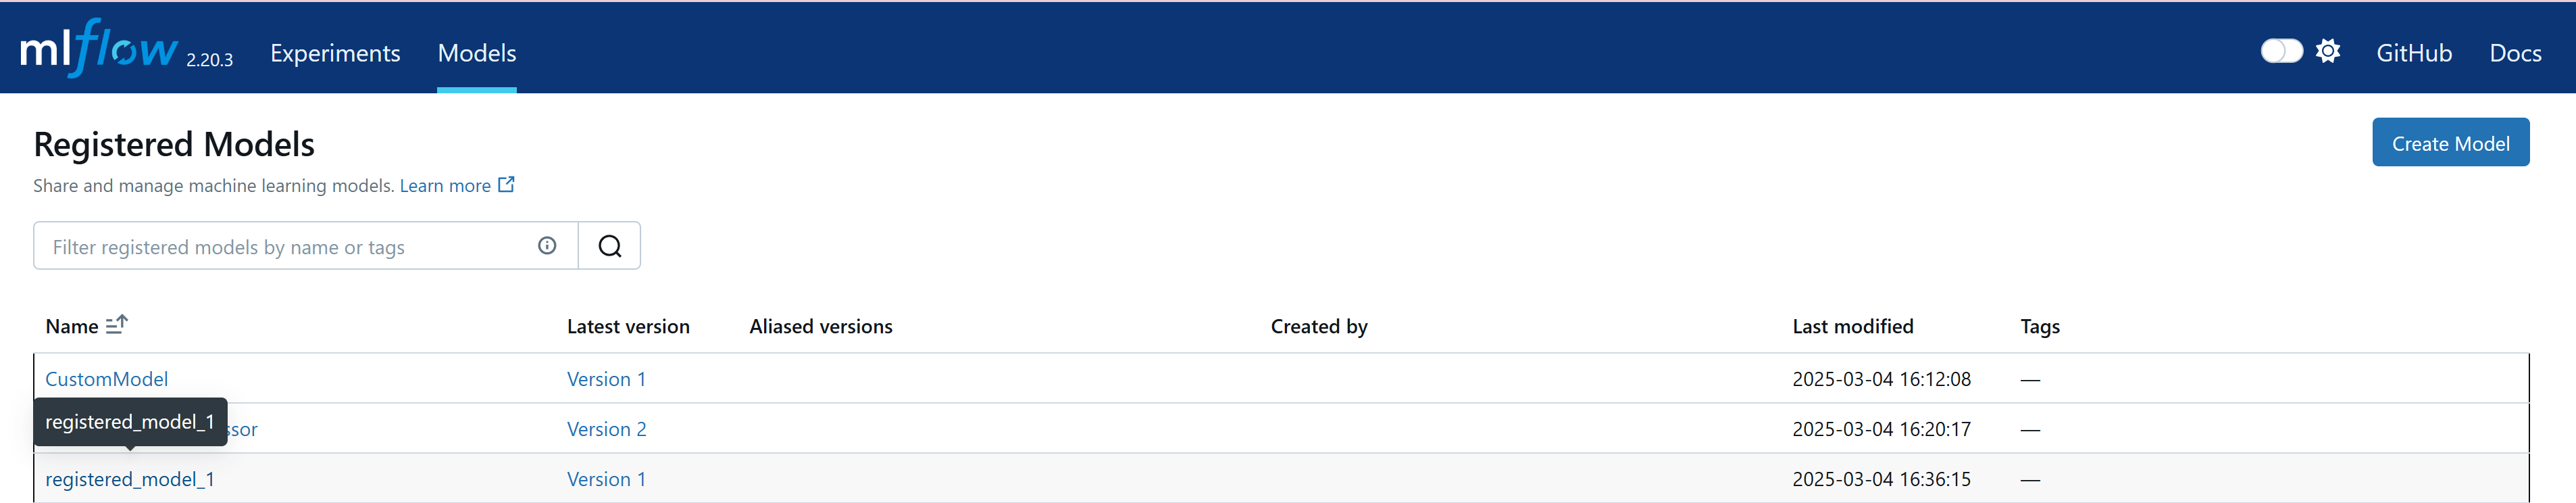

#### Since there is an existing model with the `model_name`, it creates a new version(version 2)

In [5]:
client.create_model_version(name=model_name, source=source, run_id=run_id)

<ModelVersion: aliases=[], creation_timestamp=1741074013399, current_stage='None', description=None, last_updated_timestamp=1741074013399, name='registered_model_1', run_id='533954857939339914', run_link=None, source='file:///c:/Users/dof07/Desktop/mlflow/model_registry_artifacts/97a00b6f50504b77a8693cb830d99797/artifacts/rft_modelx', status='READY', status_message=None, tags={}, user_id=None, version=2>

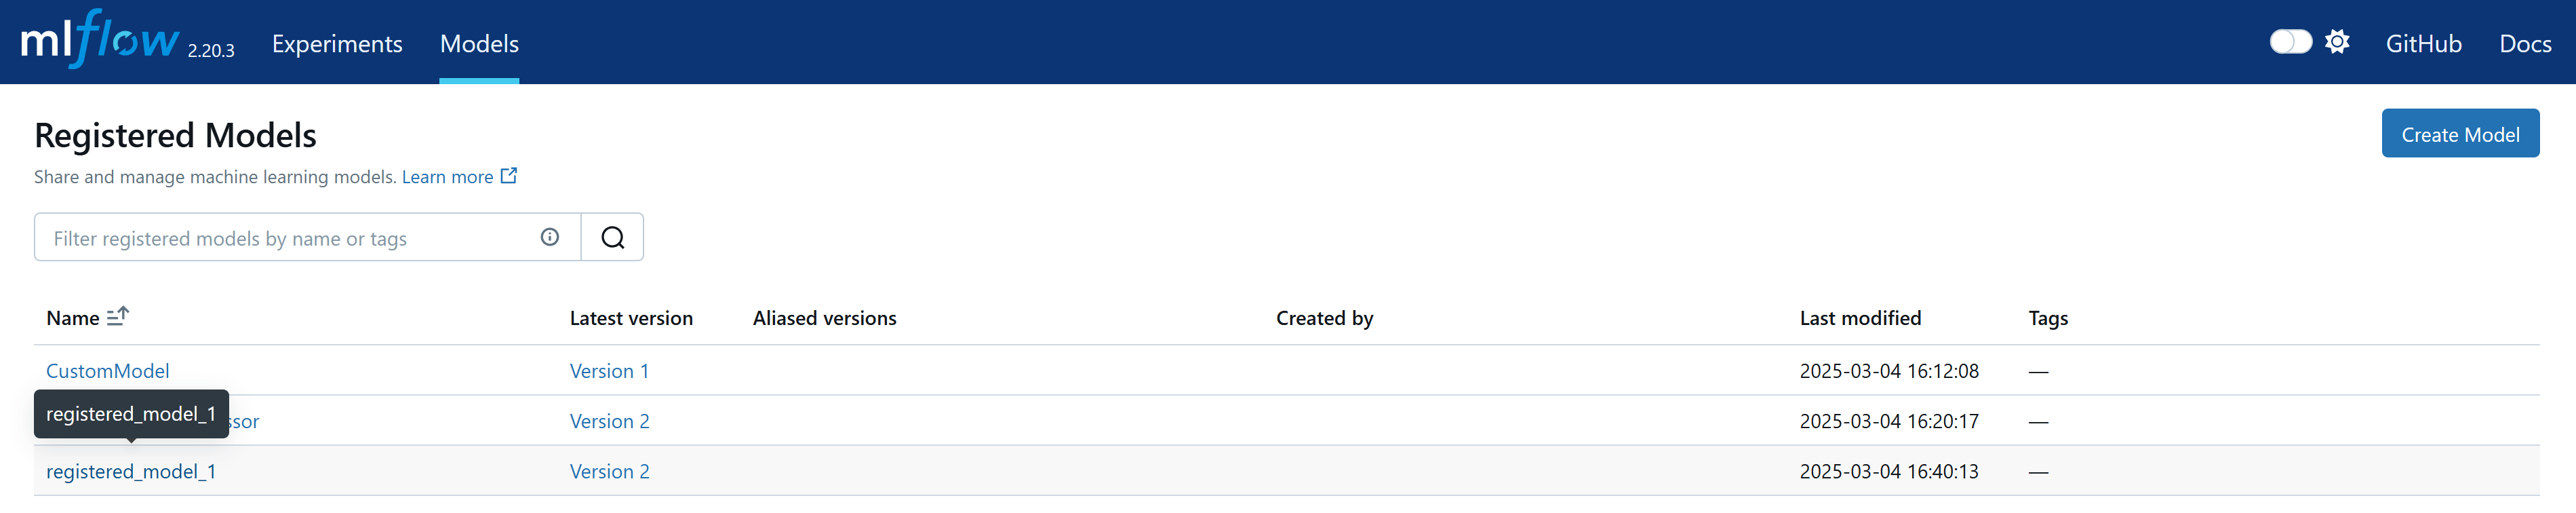

### Transition Model Version Stage

- `mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release.

In [ ]:
client.transition_model_version_stage(name=model_name, version=1, stage="Archived")

C:\Users\dof07\AppData\Local\Temp\ipykernel_10108\2142468403.py:1: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(name=model_name, version=1, stage="Archived")


<ModelVersion: aliases=[], creation_timestamp=1741073775109, current_stage='Archived', description=None, last_updated_timestamp=1741073850303, name='registered_model_1', run_id='533954857939339914', run_link=None, source='file:///c:/Users/dof07/Desktop/mlflow/model_registry_artifacts/97a00b6f50504b77a8693cb830d99797/artifacts/rft_modelx', status='READY', status_message=None, tags={}, user_id=None, version=1>

### Delete Model Version

- If version 1 is no longer used, you can delete the specific version

In [6]:
client.delete_model_version(name=model_name, version=1)

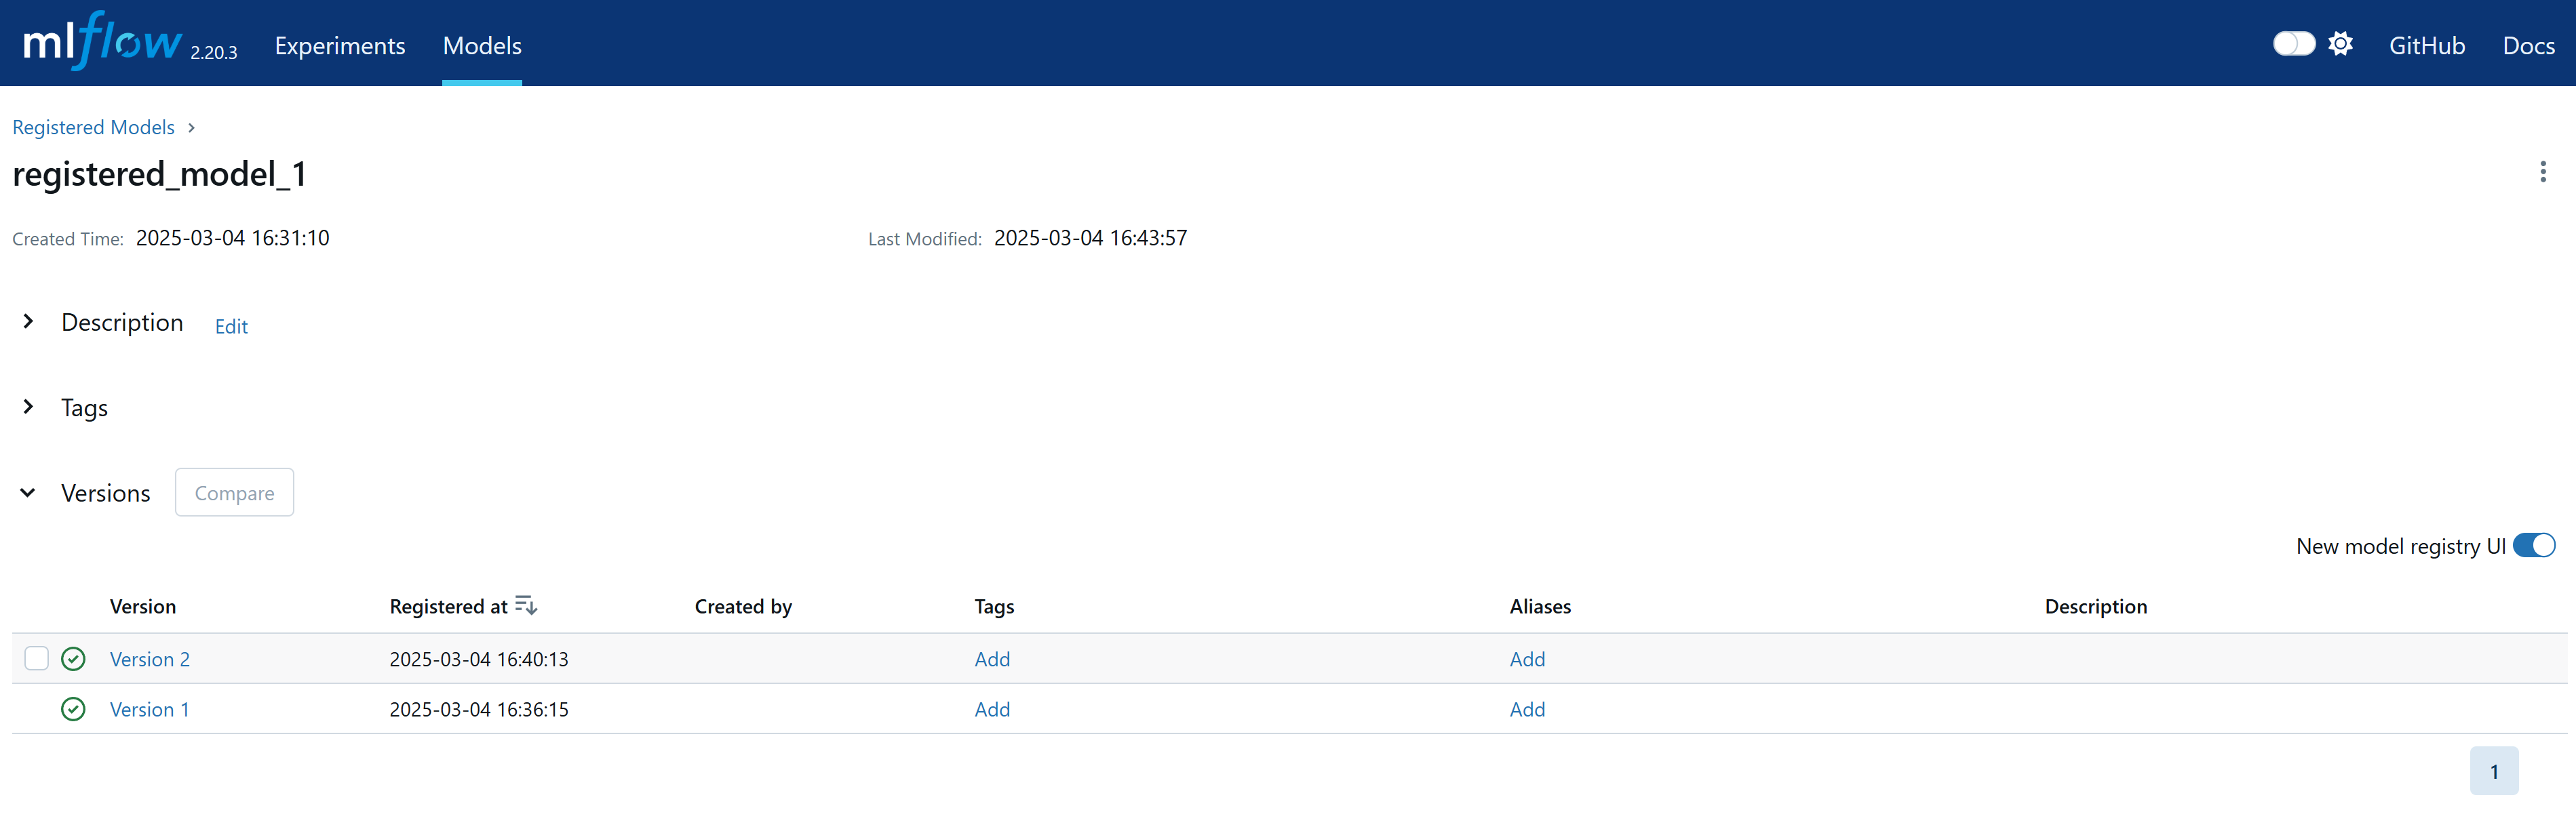

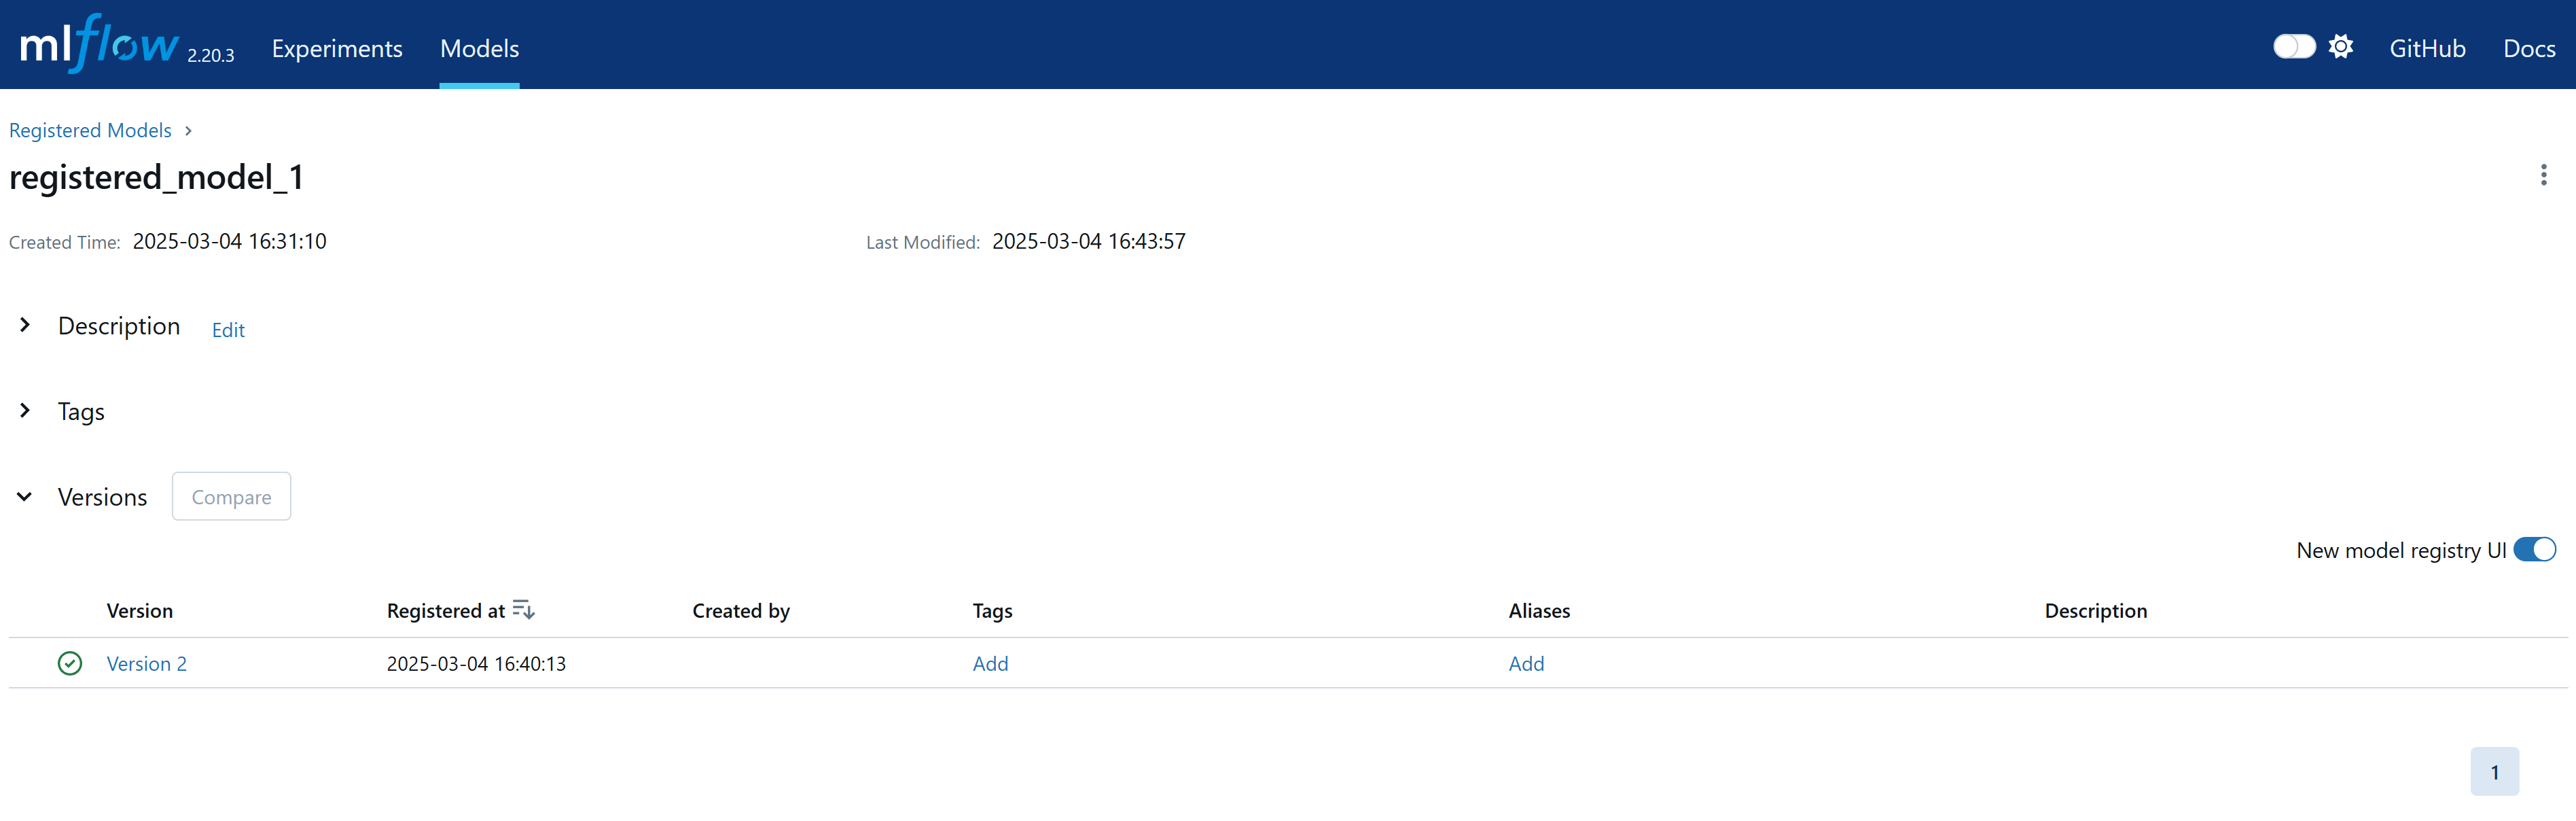

### Delete Registered Model

In [7]:
client.delete_registered_model(name=model_name)

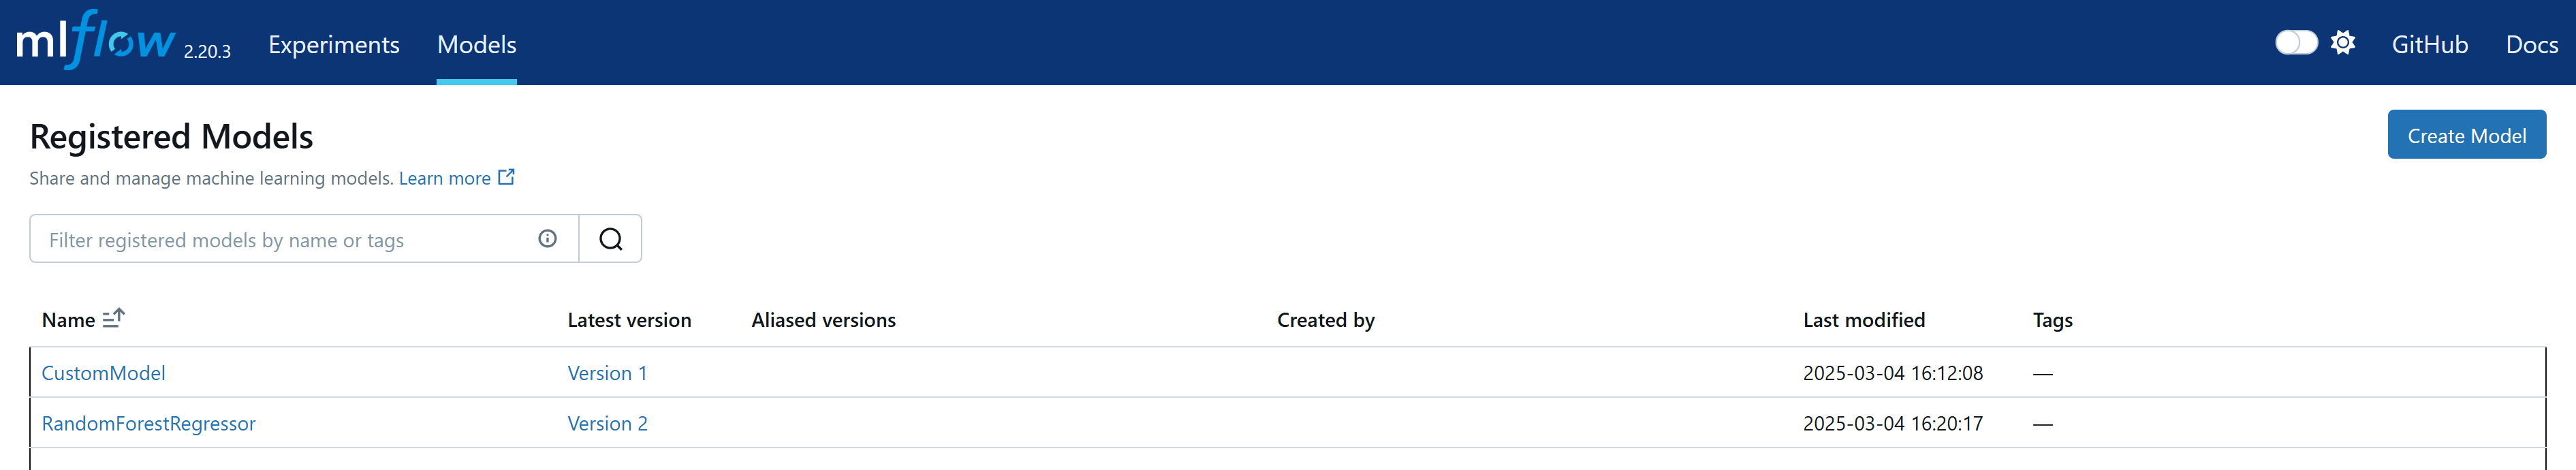